<a href="https://colab.research.google.com/github/GadirajuSanjayvarma/Text-Generation/blob/main/shakespeare_text_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the data

In [ ]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

In [ ]:
with open('/content/drive/My Drive/data.txt','r') as f:
  text=f.read()

In [ ]:
chars=tuple(set(text.lower()))

int2char=dict(enumerate(chars))
int2char[len(int2char)]='<EOS>'
char2int={char:indx for indx,char in int2char.items()}

In [ ]:
print(text.lower())

In [ ]:
# converting entire text to numbers
encoded=[char2int[ch] for ch in text.lower()]

In [ ]:
# converting entire text to numbers
encoded=[char2int[ch] for index,ch in enumerate(text.lower()) if not ( index!=len(text)-1 and  str.isspace(ch) and str.isspace(text[index+1]))][:500]

In [ ]:
# converting entire text to numbers
encoded=[char2int[ch] for index,ch in enumerate(text) if not str.isspace(ch) ][:15]

In [ ]:
print(len(encoded))

100


In [ ]:
print(len(encoded))

953759


In [ ]:
for index,i in enumerate(encoded):
  print(int2char[i],end='')
  if(index>500):
    break

 from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's

In [ ]:
valid_ratio = 0.01 
test_ratio = 0.01  
train_dataset=[encoded[i] for i in range(0,(int)(0.98*len(encoded)))]
test_dataset=[encoded[i] for i in range((int)(0.98*len(encoded)),len(encoded))]
print(len(train_dataset))
print(len(test_dataset))


490
10


In [ ]:
print(train_dataset)

In [ ]:
for index,i in enumerate(test_dataset):
  print(int2char[i],end='')
  if(index>50):
    break
  
  

hurl mak's

In [ ]:
train_dataset=encoded

In [ ]:
from torch.utils.data import Dataset
class get_dataset(Dataset):
  def __init__(self,dataset,max_len):
    self.data=[]
    count=0
    temp=[]
    for x in dataset:
      if(count>(max_len-1)):
        self.data.append(temp)
        temp=[]
        count=0
      else:
        temp.append(x)
        count+=1
    
    self.data.append(temp)   
    self.target=[x[1:]+[len(int2char)-1] for x in self.data]    
  
  def __len__(self):
    return (len(self.data))
    
  def __getitem__(self,index):
      return self.data[index],self.target[index]

In [ ]:
train=get_dataset(train_dataset,500)
#test=get_dataset(test_dataset,900)

In [ ]:
print(train)

In [ ]:
from torch.utils.data import Dataset, DataLoader

def collate(batch):
    inputs = [item[0] for item in batch]
    targets=[item[1] for item in batch]
    return inputs,targets

# Powers of two are preferred for optimal usage on the GPU
batch_size = 1

train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, collate_fn=collate)
#test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, collate_fn=collate)

In [ ]:
for inputs,targets in train_loader:
  print(inputs[0])
  print(targets[0])
  for i in targets[0]:
    print(int2char[i],end='')
  print(len(inputs[0]))
  break

[46, 21, 41, 10, 5, 46, 21, 19, 29, 41, 11, 3, 53, 46, 26, 41, 11, 19, 53, 49, 41, 11, 3, 46, 52, 11, 46, 44, 11, 3, 29, 41, 11, 46, 29, 31, 26, 41, 11, 19, 3, 11, 7, 46, 53, 28, 19, 53, 46, 53, 28, 11, 41, 11, 6, 8, 46, 6, 11, 19, 49, 53, 8, 2, 3, 46, 41, 10, 3, 11, 46, 5, 29, 32, 28, 53, 46, 31, 11, 43, 11, 41, 46, 44, 29, 11, 7, 46, 6, 49, 53, 46, 19, 3, 46, 53, 28, 11, 46, 41, 29, 1, 11, 41, 46, 3, 28, 10, 49, 30, 44, 46, 6, 8, 46, 53, 29, 5, 11, 46, 44, 11, 26, 11, 19, 3, 11, 7, 46, 28, 29, 3, 46, 53, 11, 31, 44, 11, 41, 46, 28, 11, 29, 41, 46, 5, 29, 32, 28, 53, 46, 6, 11, 19, 41, 46, 28, 29, 3, 46, 5, 11, 5, 10, 41, 8, 35, 46, 6, 49, 53, 46, 53, 28, 10, 49, 46, 26, 10, 31, 53, 41, 19, 26, 53, 11, 44, 46, 53, 10, 46, 53, 28, 29, 31, 11, 46, 10, 52, 31, 46, 6, 41, 29, 32, 28, 53, 46, 11, 8, 11, 3, 7, 46, 21, 11, 11, 44, 2, 3, 53, 46, 53, 28, 8, 46, 30, 29, 32, 28, 53, 2, 3, 46, 21, 30, 19, 5, 11, 46, 52, 29, 53, 28, 46, 3, 11, 30, 21, 9, 3, 49, 6, 3, 53, 19, 31, 53, 29, 19, 30, 46

In [ ]:
print(len(int2char))

57


In [ ]:
class CharRNN(nn.Module):
  def __init__(self,n_hidden=50,n_classes=83,n_layers=2,drop_prob=0.5,vocab_dim=50,emb_size=50,batch_size=64,device="cuda"):
      super().__init__()
      self.drop_prob = drop_prob
      self.n_layers = n_layers
      self.n_hidden = n_hidden
      self.batch_size=batch_size
      self.device=device
      self.embedding=nn.Embedding(vocab_dim,emb_size)
      self.lstm=nn.LSTM(emb_size,n_hidden,n_layers,dropout=self.drop_prob)
      self.linear=nn.Linear(n_hidden,n_classes)
      self.dropout=nn.Dropout(self.drop_prob)

  def init_hidden(self):
        """Set initial hidden states."""
        h0 = torch.randn(
            self.n_layers,
            self.batch_size,
            self.n_hidden,
        )
        c0 = torch.randn(
            self.n_layers,
            self.batch_size,
            self.n_hidden,
        )
        
        h0 = h0.to(self.device)
        c0 = c0.to(self.device)

        return h0, c0    


  def apply_rnn(self, embedding_out,previous_hiddens):
        print("embedding dimension is",embedding_out.shape)
        if(previous_hiddens==False):
          activations, (hn,cn) = self.lstm(embedding_out, self.init_hidden())
        else:
          activations, (hn,cn) = self.lstm(embedding_out,previous_hiddens)
        print("activation size is",activations.shape)
        return activations,(hn,cn)

  def forward(self, inputs,previous_hiddens=False,return_activations=False):
        self.batch_size = len(inputs)
    
        inputs = torch.LongTensor(inputs).to(self.device)
        inputs=inputs.transpose(0,1)
        print(inputs.shape)
        # Get embeddings
        embedding_out = self.embedding(inputs)
        
        activations,(hn,cn) = self.apply_rnn(embedding_out,previous_hiddens)
        
        activations=activations.transpose(0,1) # output shape [batchSize,fixed_length,emb_length]
        #activations=self.dropout(activations)
        activations=self.linear(activations)
        
        #out = torch.sigmoid(activations)

        # Put the output back in correct order
        return activations,(hn,cn)    


In [ ]:
device="cuda"

In [ ]:
dropout_probability = 0.2  
n_rnn_layers = 2
embedding_dimension = 150
hidden_size = 250
is_bidirectional = False  
max_epochs = 10   
model = CharRNN(
    n_hidden=hidden_size,
    n_classes=len(int2char),
    vocab_dim=len(int2char),
    drop_prob=dropout_probability,
    n_layers=n_rnn_layers,
    emb_size=embedding_dimension,
    batch_size=batch_size,
    device=device

)
model = model.to(device)
print(model)
pytorch_total_params = sum(p.numel() for p in model.parameters())
print("total parameters are",pytorch_total_params)

CharRNN(
  (embedding): Embedding(57, 150)
  (lstm): LSTM(150, 250, num_layers=2, dropout=0.2)
  (linear): Linear(in_features=250, out_features=57, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)
total parameters are 926857


In [ ]:
def train_epoch(model, optimizer, train_loader):
    model.train()
    total_loss = total = 0
    
    progress_bar = tqdm_notebook(train_loader, desc='Training', leave=False)
    for inputs,targets in progress_bar:
        targets=torch.LongTensor(targets)
        target = targets.to(device)
        
        optimizer.zero_grad()
        
        # Forwards pass
        #print(inputs.shape)
        output,_ = model(inputs)
        
        outputs=output.permute(0,2,1)
        print(outputs.shape)
        print(target.shape)
        loss = nn.CrossEntropyLoss()(outputs, target)

        # Perform gradient descent, backwards pass
        loss.backward()
        #train_loss.append(loss.item())
        # Take a step in the right direction
        optimizer.step()
        #scheduler.step()

        # Record metrics
        total_loss += loss.item()
        total += len(target)
        progress_bar.set_description(
        f'train_loss: {loss:.2e}'
        f'\tavg_loss: {total_loss/total:.2e}\n',
      )

    return total_loss / total


def validate_epoch(model, valid_loader):
    model.eval()
    total_loss = total = 0
    with torch.no_grad():
        progress_bar = tqdm_notebook(valid_loader, desc='Validating', leave=False)
        for inputs, target in progress_bar:
            targets=torch.LongTensor(target)
            target = targets.to(device)
            
            # Forwards pass
            output,_ = model(inputs)
           
            outputs=output.permute(0,2,1)
            
            loss = nn.CrossEntropyLoss()(outputs, target)
            #test_loss.append(loss.item())
            # Record metrics
            total_loss += loss.item()
            total += len(target)

    return total_loss / total

In [ ]:
train_loss = train_epoch(model, optimizer,train_loader)
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


torch.Size([500, 1])
embedding dimension is torch.Size([500, 1, 150])
activation size is torch.Size([500, 1, 250])
torch.Size([1, 57, 500])
torch.Size([1, 500])


In [ ]:
from torch import optim


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01,amsgrad=True)


In [ ]:

from tqdm import tqdm, tqdm_notebook

In [ ]:
def get_hidden():
        """Set initial hidden states."""
        h0 = torch.randn(
            n_rnn_layers,
            1,
            hidden_size,
        )
        c0 = torch.randn(
            n_rnn_layers,
            1,
            hidden_size,
        )
        
        h0 = h0.to(device)
        c0 = c0.to(device)

        return h0, c0

In [ ]:
import time

In [ ]:
def print_re(text,hiddens):
  print(text,end='')
  model.eval()
  h0,c0=get_hidden()
  with torch.no_grad():
        # Forwards pass
        tokens=[[char2int[text]]]
        #print(tokens)
        for i in range(0,500):
          output,(h0,c0) = model(tokens,previous_hiddens=(h0,c0))
          #outputs=output.permute(0,2,1)
          #print(output.shape)
          hidden_output=output[0].squeeze(0).squeeze(0)
          if(i!=0 and  i%150==0):
            print()
          prediction = hidden_output.cpu().numpy()
          #print(prediction)
          prediction = np.argsort(-prediction, axis=0)
          #print(prediction)
          print(int2char[prediction[0]],end='')
          #time.sleep(0.15)
          #print(h0)
          tokens=[[prediction[0]]]
          #print(tokens)

In [ ]:
#reby beauty's rose might never die, but as the ri<EOS>50
print_re('f',get_hidden())

fuu]uauaaauaaauaaaauaaaauaaaauaaaauaaaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk'''
'''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk'''
'''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk'''
'''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk'''
'''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk'''
'''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk'''
'''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''qiiaakkkk''''''

In [ ]:
print(text[:500])

  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
 


In [ ]:
train_losses, valid_losses = [], []
n_epochs=0
for _ in tqdm_notebook( range(1000)):
    train_loss = train_epoch(model, optimizer,train_loader)
    #valid_loss = validate_epoch(model, test_loader)
    valid_loss=0
    #print()
    print()
    #print("reby beauty's rose might never die, but as the ri<EOS>50")
    print_re('f',get_hidden())
    print()
    #print()

    tqdm.write(
        f'epoch #{n_epochs + 1:3d}\ttrain_loss: {train_loss:.2e}'
        f'\tvalid_loss: {valid_loss:.2e}\n',
    )
    '''if len(valid_losses) > 10 and all(valid_loss >= loss
                                     for loss in valid_losses[-10:]):
        print('Stopping early')
        break
    '''
    # Early stopping if the current valid_loss is greater than the last three valid losses
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    n_epochs+=1
   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """



f<EOS>w thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy 
foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy 
content, and tender churl mak's<EOS> from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by tim
e decease, his tender heir might bear his memory: 
epoch #  1	train_loss: 3.23e-02	valid_loss: 0.00e+00




flaking a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to 
the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS> from fairest creatures we desire increase, that thereby beauty's r
ose might never die, but as the riper should by time decease, his tender heir might bear his memory: but thou contracted to thine own bright eyes, fee
d'st thy light's flame with self-substantial fuel,
epoch #  2	train_loss: 3.30e-02	valid_loss: 0.00e+00




ffrom fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might 
bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance l
ies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine ow
n bud buriest thy content, and tender churl mak's<EOS>
epoch #  3	train_loss: 2.18e-02	valid_loss: 0.00e+00




f-b-4wline might never die, but as the riper should by time decease, his tender heir might bear his memory: but thou contracted to thine own bright eye
s, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou tha
t art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS> from fair
est creatures we desire increase, that thereby bea
epoch #  4	train_loss: 2.50e-02	valid_loss: 0.00e+00




fe desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might bear his memory: but tho
u contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, t
o thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy conten
t, and tender churl mak's<EOS> from fairest creatures 
epoch #  5	train_loss: 2.40e-02	valid_loss: 0.00e+00




fsh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bstantial fuel, making a famine whe
re abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, w
ithin thine own bud buriest thy content, and tender churl mak's<EOS>bstantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet s
elf too cruel: thou that art now the world's fresh
epoch #  6	train_loss: 2.36e-02	valid_loss: 0.00e+00




fthat thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might bear his memory: but thou contracted to thi
ne own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self to
o cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl
 mak's<EOS>bstantial fuel, making a famine where abund
epoch #  7	train_loss: 1.85e-02	valid_loss: 0.00e+00




f thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>b
st own bud buriest thy content, and tender churl mak's<EOS>bst own bud buriest thy content, and tender churl mak's<EOS>bst own bud buriest thy content, and te
nder churl mak's<EOS>bst own bud buriest thy content, and tender churl mak's<EOS>bst own bud buriest thy content, and tender churl mak's<EOS>bst own bud buriest t
hy content, and tender churl mak's<EOS>bst own bud bur
epoch #  8	train_loss: 2.52e-02	valid_loss: 0.00e+00




f from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might
 bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance 
lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's
epoch #  9	train_loss: 1.87e-02	valid_loss: 0.00e+00




fro bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cr
uel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak
's<EOS>bstantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, 
and only herald to the gaudy spring, within thine 
epoch # 10	train_loss: 1.69e-02	valid_loss: 0.00e+00




for contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, 
to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy conte
nt, and tender churl mak's<EOS> fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease,
 his tender heir might bear his memory: but thou c
epoch # 11	train_loss: 1.77e-02	valid_loss: 0.00e+00




for contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, 
to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy conte
nt, and tender churl mak's<EOS> fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease,
 his tender heir might bear his memory: but thou c
epoch # 12	train_loss: 2.09e-02	valid_loss: 0.00e+00




fbbwcccros within thine own bud buriest thy content, and tender churl mak's<EOS>bstantial fuel, making a famine where abundance lies, thy self thy foe, to 
thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content,
 and tender churl mak's<EOS>bstantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the wor
ld's fresh ornament, and only herald to the gaudy 
epoch # 13	train_loss: 1.48e-02	valid_loss: 0.00e+00




fame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fre
sh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bstantial fuel, making a famine whe
re abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, w
ithin thine own bud buriest thy content, and tende
epoch # 14	train_loss: 2.15e-02	valid_loss: 0.00e+00




ft might bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abu
ndance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within 
thine own bud buriest thy content, and tender churl mak's<EOS>bstantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self to
o cruel: thou that art now the world's fresh ornam
epoch # 15	train_loss: 1.68e-02	valid_loss: 0.00e+00




fppckcrease, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might bear his memory: but thou contr
acted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy s
weet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and 
tender churl mak's<EOS>bstantial fuel, making a famine
epoch # 16	train_loss: 1.11e-02	valid_loss: 0.00e+00




fros tender heir might bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a fa
mine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy s
pring, within thine own bud buriest thy content, and tender churl mak's<EOS>bstantial fuel, making a famine where abundance lies, thy self thy foe, to thy
 sweet self too cruel: thou that art now the world
epoch # 17	train_loss: 2.57e-02	valid_loss: 0.00e+00




from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might b
ear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance li
es, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own
 bud buriest thy content, and tender churl mak's<EOS>b
epoch # 18	train_loss: 1.95e-02	valid_loss: 0.00e+00




fwine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy s
pring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl
 mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy conte
nt, and tender churl mak's<EOS>bsthe gaudy spring, wit
epoch # 19	train_loss: 1.49e-02	valid_loss: 0.00e+00




fcthe world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring,
 within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl mak's
<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, an
d tender churl mak's<EOS>bsthe gaudy spring, within th
epoch # 20	train_loss: 2.22e-02	valid_loss: 0.00e+00




frame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fr
esh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy sp
ring, within thine own bud buriest thy content, an
epoch # 21	train_loss: 1.77e-02	valid_loss: 0.00e+00




fcros the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, 
and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud b
uriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, wi
thin thine own bud buriest thy content, and tender
epoch # 22	train_loss: 1.43e-02	valid_loss: 0.00e+00




fh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own
 bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spri
ng, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl ma
k's<EOS>bsthe gaudy spring, within thine own bud burie
epoch # 23	train_loss: 1.43e-02	valid_loss: 0.00e+00




f to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy cont
ent, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own 
bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe gaudy sprin
g, within thine own bud buriest thy content, and t
epoch # 24	train_loss: 1.39e-02	valid_loss: 0.00e+00




f from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might
 bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance 
lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's
epoch # 25	train_loss: 1.62e-02	valid_loss: 0.00e+00




fwline might never die, but as the riper should by time decease, his tender heir might bear his memory: but thou contracted to thine own bright eyes, f
eed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that ar
t now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe riper sh
ould by time decease, his tender heir might bear h
epoch # 26	train_loss: 1.22e-02	valid_loss: 0.00e+00




ffrom self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and 
tender churl mak's<EOS>bsthe riper should by time decease, his tender heir might bear his memory: but thou contracted to thine own bright eyes, feed'st th
y light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the
 world's fresh ornament, and only herald to the ga
epoch # 27	train_loss: 1.33e-02	valid_loss: 0.00e+00




f from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might
 bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance 
lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's
epoch # 28	train_loss: 1.62e-02	valid_loss: 0.00e+00




from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might b
ear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance li
es, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own
 bud buriest thy content, and tender churl mak's<EOS>b
epoch # 29	train_loss: 1.27e-02	valid_loss: 0.00e+00




ffor mak's<EOS> fuel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tend
er churl mak's<EOS>bsthe riper should by time decease, his tender heir might bear his memory: but thou contracted to thine own bright eyes, feed'st thy li
ght's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the wor
ld's fresh ornament, and only herald to the gaudy 
epoch # 30	train_loss: 1.51e-02	valid_loss: 0.00e+00




fm fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might bea
r his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies
, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own b
ud buriest thy content, and tender churl mak's<EOS>bst
epoch # 31	train_loss: 1.07e-02	valid_loss: 0.00e+00




fbwpres we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might bear his memory:
 but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self th
y foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest th
y content, and tender churl mak's<EOS>bsthat thereby b
epoch # 32	train_loss: 1.36e-02	valid_loss: 0.00e+00




fh ornament, and tender churl mak's<EOS>bsthat thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might bear h
is memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, t
hy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud 
buriest thy content, and tender churl mak's<EOS>bsthat
epoch # 33	train_loss: 1.30e-02	valid_loss: 0.00e+00




fabbbbbkwxcffrom fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender 
heir might bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where 
abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, with
in thine own bud buriest thy content, and tender c
epoch # 34	train_loss: 1.17e-02	valid_loss: 0.00e+00




fgdesh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS> fuel: thou that art now the wor
ld's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS> fuel: thou that art now th
e world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS> fuel: thou that art n
ow the world's fresh ornament, and only herald to 
epoch # 35	train_loss: 1.24e-02	valid_loss: 0.00e+00




fe might never die, but as the riper should by time decease, his tender heir might bear his memory: but thou contracted to thine own bright eyes, feed'
st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art no
w the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe riper should
 by time decease, his tender heir might bear his m
epoch # 36	train_loss: 1.15e-02	valid_loss: 0.00e+00




fw ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthe riper should by time decease, 
his tender heir might bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a fa
mine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy s
pring, within thine own bud buriest thy content, a
epoch # 37	train_loss: 1.07e-02	valid_loss: 0.00e+00




fw from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir migh
t bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance
 lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine 
own bud buriest thy content, and tender churl mak'
epoch # 38	train_loss: 1.03e-02	valid_loss: 0.00e+00




f from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might
 bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance 
lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's
epoch # 39	train_loss: 9.21e-03	valid_loss: 0.00e+00




f from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might
 bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance 
lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's
epoch # 40	train_loss: 8.63e-03	valid_loss: 0.00e+00




fulame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's f
resh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bstheracted to thine own bud buri
est thy content, and tender churl mak's<EOS>bstheracted to thine own bud buriest thy content, and tender churl mak's<EOS>bstheracted to thine own bud buriest 
thy content, and tender churl mak's<EOS>bstheracted to
epoch # 41	train_loss: 7.47e-03	valid_loss: 0.00e+00




fd fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might bea
r his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies
, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own b
ud buriest thy content, and tender churl mak's<EOS>bst
epoch # 42	train_loss: 7.36e-03	valid_loss: 0.00e+00




f from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might
 bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance 
lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's
epoch # 43	train_loss: 8.61e-03	valid_loss: 0.00e+00




fros tender heir might bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a fa
mine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy s
pring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthy sweet self too cruel: thou that art now the world's fresh ornament, and 
only herald to the gaudy spring, within thine own 
epoch # 44	train_loss: 6.20e-03	valid_loss: 0.00e+00




f from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might
 bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance 
lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender heir might 
epoch # 45	train_loss: 6.16e-03	valid_loss: 0.00e+00




flies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's<EOS>bsthy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the ga
udy spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthy sweet self too cruel: thou that art now the world's fresh ornament,
 and only herald to the gaudy spring, within thine
epoch # 46	train_loss: 1.54e-02	valid_loss: 0.00e+00




fd tender churl mak's<EOS>bsthy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own b
ud buriest thy content, and tender churl mak's<EOS>bsthy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy 
spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthy sweet self too cruel: thou that art now the world's fresh ornament, and
 only herald to the gaudy spring, within thine own
epoch # 47	train_loss: 6.12e-03	valid_loss: 0.00e+00




f from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might
 bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance 
lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's
epoch # 48	train_loss: 5.26e-03	valid_loss: 0.00e+00




fros tender heir might bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a fa
mine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy s
pring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthy sweet self too cruel: thou that art now the world's fresh ornament, and 
only herald to the gaudy spring, within thine own 
epoch # 49	train_loss: 1.30e-02	valid_loss: 0.00e+00




ft own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance lies, thy self thy foe, to thy sweet self too
 cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy content, and tender churl 
mak's<EOS>bsthy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine own bud buriest thy 
content, and tender churl mak's<EOS>bsthy sweet self t
epoch # 50	train_loss: 6.73e-03	valid_loss: 0.00e+00




fre his tender heir might bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a
 famine where abundance lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaud
y spring, within thine own bud buriest thy content, and tender churl mak's<EOS>bsthy sweet self too cruel: thou that art now the world's fresh ornament, a
nd only herald to the gaudy spring, within thine o
epoch # 51	train_loss: 6.05e-03	valid_loss: 0.00e+00




f from fairest creatures we desire increase, that thereby beauty's rose might never die, but as the riper should by time decease, his tender heir might
 bear his memory: but thou contracted to thine own bright eyes, feed'st thy light's flame with self-substantial fuel, making a famine where abundance 
lies, thy self thy foe, to thy sweet self too cruel: thou that art now the world's fresh ornament, and only herald to the gaudy spring, within thine o
wn bud buriest thy content, and tender churl mak's
epoch # 52	train_loss: 6.37e-03	valid_loss: 0.00e+00




f from fai

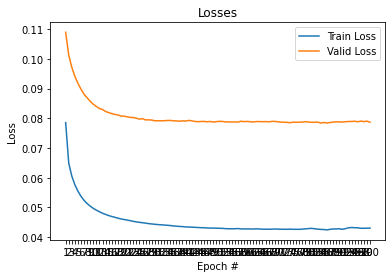

In [ ]:

epoch_ticks = range(1, n_epochs + 1)
plt.plot(epoch_ticks, train_losses)
plt.plot(epoch_ticks, valid_losses)
plt.legend(['Train Loss', 'Valid Loss'])
plt.title('Losses') 
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.xticks(epoch_ticks)
plt.show()